In [1]:
import pytest
import numpy as np
import glob
import json
import jwst
from jwst import datamodels
from astropy.io import fits, ascii
from jwst.associations.asn_from_list import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, Spec3Pipeline, collect_pipeline_cfgs
from astropy.coordinates import Angle
from astropy.table import Table, vstack, unique
from astropy.stats import sigma_clip
from jwst.pipeline import calwebb_spec3
from jwst.associations.asn_from_list import asn_from_list
import matplotlib.pyplot as plt
import random
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.outlier_detection import outlier_detection
from ci_watson.artifactory_helpers import get_bigdata

In [2]:
Slitfile1 = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_spec2',
                                    'spec2_miri_test',
                                    'miri_lrs_slit_pt_nod1_v2.3.fits')
 
Slitfile2 = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_spec2',
                                    'spec2_miri_test',
                                    'miri_lrs_slit_pt_nod2_v2.3.fits')

In [3]:
det_nod1 = Detector1Pipeline.call(Slitfile1, config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')
det_nod2 = Detector1Pipeline.call(Slitfile2, config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')

2021-07-12 13:41:22,120 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: /grp/crds/cache/references/jwst/jwst_miri_pars-detector1pipeline_0001.asdf
2021-07-12 13:41:22,244 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2021-07-12 13:41:22,245 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2021-07-12 13:41:22,246 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2021-07-12 13:41:22,247 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2021-07-12 13:41:22,249 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2021-07-12 13:41:22,250 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2021-07-12 13:41:22,251 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2021-07-12 13:41:22,252 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2021-07-12 13:41:22,254 - stpipe.Detector1Pipeline.firstfram

2021-07-12 13:41:22,808 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_miri_readnoise_0057.fits'.
2021-07-12 13:41:22,846 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.
2021-07-12 13:41:22,847 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is '/grp/crds/cache/references/jwst/jwst_miri_reset_0047.fits'.
2021-07-12 13:41:22,928 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is '/grp/crds/cache/references/jwst/jwst_miri_rscd_0010.fits'.
2021-07-12 13:41:22,962 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_miri_saturation_0026.fits'.
2021-07-12 13:41:22,997 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.
2021-07-12 13:41:22,998 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.
2021-07-12 13:41:22,998 - stp

2021-07-12 13:42:17,949 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits
2021-07-12 13:42:31,441 - stpipe.Detector1Pipeline.linearity - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_linearity.fits
2021-07-12 13:42:31,442 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2021-07-12 13:42:31,510 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 10, 1024, 1032) from miri_lrs_slit_pt_nod1_v2.3_linearity.fits>,).
2021-07-12 13:42:31,512 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation', 'type': 'baselin

2021-07-12 13:53:34,468 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_0_ramp_fit.fits
2021-07-12 13:53:34,668 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_1_ramp_fit.fits
2021-07-12 13:53:34,669 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2021-07-12 13:53:34,750 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod1_v2.3_0_ramp_fit.fits>,).
2021-07-12 13:53:34,752 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_s

2021-07-12 13:53:35,884 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'miri_lrs_slit_pt_nod2_v2.3.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2021-07-12 13:53:35,986 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_miri_dark_0058.fits'.
2021-07-12 13:53:36,020 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits'.
2021-07-12 13:53:36,038 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits'.
2021-07-12 13:53:36,072 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_miri_mask_0023.fits'.
2021-07-12 13:53:36,122 - stpipe.Detector1Pipeline - INFO - Prefetch for PERSA

2021-07-12 13:53:42,820 - stpipe.Detector1Pipeline.reset - INFO - Using RESET reference file /grp/crds/cache/references/jwst/jwst_miri_reset_0047.fits
2021-07-12 13:54:28,501 - stpipe.Detector1Pipeline.reset - INFO - Step reset done
2021-07-12 13:54:28,581 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity running with args (<RampModel(2, 10, 1024, 1032) from miri_lrs_slit_pt_nod2_v2.3_lastframe.fits>,).
2021-07-12 13:54:28,582 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation'}
2021-07-12 13:54:28,743 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits
2021-07-12 13:54:37

2021-07-12 13:54:53,411 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using GAIN reference file: /grp/crds/cache/references/jwst/jwst_miri_gain_0008.fits
2021-07-12 13:54:53,463 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2021-07-12 13:54:53,464 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2021-07-12 13:54:53,539 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2021-07-12 13:54:53,541 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2021-07-12 13:55:10,252 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2021-07-12 13:55:10,252 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2021-07-12 13:55:10,411 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod2_v2.3_0_ramp_fit.fits
2021-07-12 13:55:10,620 - s

In [4]:
spec1 = Spec2Pipeline.call(det_nod1, save_results=True)
spec2 = Spec2Pipeline.call(det_nod2, save_results=True)

2021-07-12 13:55:11,246 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

2021-07-12 13:55:11,417 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2021-07-12 13:55:11,418 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2021-07-12 13:55:11,420 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2021-07-12 13:55:11,421 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2021-07-12 13:55:11,423 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.
2021-07-12 13:55:11,424 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2d

2021-07-12 13:55:11,543 - stpipe.Spec2Pipeline - INFO - Prefetching reference files for dataset: 'miri_lrs_slit_pt_nod1_v2.3_gain_scale.fits' reftypes = ['apcorr', 'area', 'barshadow', 'camera', 'collimator', 'cubepar', 'dflat', 'disperser', 'distortion', 'drizpars', 'extract1d', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'fringe', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'msaoper', 'ote', 'pathloss', 'photom', 'regions', 'resol', 'sflat', 'specwcs', 'wavecorr', 'wavelengthrange', 'wfssbkg']
2021-07-12 13:55:11,673 - stpipe.Spec2Pipeline - INFO - Prefetch for APCORR reference file is '/grp/crds/cache/references/jwst/jwst_miri_apcorr_0007.fits'.
2021-07-12 13:55:11,705 - stpipe.Spec2Pipeline - INFO - Prefetch for AREA reference file is 'N/A'.
2021-07-12 13:55:11,706 - stpipe.Spec2Pipeline - INFO - Prefetch for BARSHADOW reference file is 'N/A'.
2021-07-12 13:55:11,707 - stpipe.Spec2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2021-07-12 13:55:11,707 - stpipe.Spec

2021-07-12 13:55:13,625 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step skipped.
2021-07-12 13:55:13,626 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract done
2021-07-12 13:55:13,687 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod1_v2.3_gain_scale.fits>,).
2021-07-12 13:55:13,689 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2021-07-12 13:55:13,690 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step skipped.
2021-07-12 13:55:13,691 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging done
2021-07-12 13:55:13,754 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype running with args (<Image

2021-07-12 13:55:18,030 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-12 13:55:18,207 - stpipe.Spec2Pipeline.resample_spec - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",

2021-07-12 13:55:18,210 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling slit None (387, 44)
2021-07-12 13:55:18,642 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-12 13:55:18,661 - stpipe.Spec2Pipeline.resample_spec - INFO - Update S_REGION to POLYGON ICRS  179.999087909 -0.000075806 180.000404817 -0.000075806 180.000404817 0.000033658 179.999087909 0.000033658
2021-07-12 13:55:18,733 - stpipe.Spec2Pipeline.resample_spec - INFO - Saved model i

2021-07-12 13:55:19,844 - stpipe.Spec2Pipeline - INFO - Prefetching reference files for dataset: 'miri_lrs_slit_pt_nod2_v2.3_gain_scale.fits' reftypes = ['apcorr', 'area', 'barshadow', 'camera', 'collimator', 'cubepar', 'dflat', 'disperser', 'distortion', 'drizpars', 'extract1d', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'fringe', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'msaoper', 'ote', 'pathloss', 'photom', 'regions', 'resol', 'sflat', 'specwcs', 'wavecorr', 'wavelengthrange', 'wfssbkg']
2021-07-12 13:55:19,880 - stpipe.Spec2Pipeline - INFO - Prefetch for APCORR reference file is '/grp/crds/cache/references/jwst/jwst_miri_apcorr_0007.fits'.
2021-07-12 13:55:19,898 - stpipe.Spec2Pipeline - INFO - Prefetch for AREA reference file is 'N/A'.
2021-07-12 13:55:19,899 - stpipe.Spec2Pipeline - INFO - Prefetch for BARSHADOW reference file is 'N/A'.
2021-07-12 13:55:19,900 - stpipe.Spec2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2021-07-12 13:55:19,900 - stpipe.Spec

2021-07-12 13:55:21,573 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step skipped.
2021-07-12 13:55:21,574 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract done
2021-07-12 13:55:21,633 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod2_v2.3_gain_scale.fits>,).
2021-07-12 13:55:21,635 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2021-07-12 13:55:21,636 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step skipped.
2021-07-12 13:55:21,636 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging done
2021-07-12 13:55:21,695 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype running with args (<Image

2021-07-12 13:55:22,890 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-12 13:55:23,018 - stpipe.Spec2Pipeline.resample_spec - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/jwst/resample/resample_utils.py:153: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",

2021-07-12 13:55:23,024 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling slit None (387, 44)
2021-07-12 13:55:23,490 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-12 13:55:23,508 - stpipe.Spec2Pipeline.resample_spec - INFO - Update S_REGION to POLYGON ICRS  179.999611282 -0.000032303 180.000928190 -0.000032303 180.000928190 0.000077161 179.999611282 0.000077161
2021-07-12 13:55:23,577 - stpipe.Spec2Pipeline.resample_spec - INFO - Saved model i

In [204]:
cal_files = glob.glob('*_cal.fits')
print(cal_files)

spec1file = datamodels.open(spec1)
#asn3 = asn_from_list(cal_files, rule=DMS_Level3_Base,product_name='combine_dithers_exposures')

['miri_lrs_slit_pt_nod2_v2_cal.fits', 'miri_lrs_slit_pt_nod1_v2_cal.fits']


In [167]:
#with open('sp3-lrs-slit-test_asn.json', 'w') as fp:
    #fp.write(asn3.dump()[1])
    
spec2_file1 = datamodels.open(cal_files[0])
spec2_file2 = datamodels.open(cal_files[1])
print(spec2_file1.data)

<array (unloaded) shape: [1024, 1032] dtype: >f4>


In [117]:
print(spec2_file1.meta.wcs.bounding_box[0][1]), spec2_file1.meta.wcs.bounding_box[0][0], spec2_file1.meta.wcs.bounding_box[1][1], spec2_file1.meta.wcs.bounding_box[1][0]
bbox_w = spec2_file1.meta.wcs.bounding_box[0][1] - spec2_file1.meta.wcs.bounding_box[0][0]
bbox_ht = spec2_file1.meta.wcs.bounding_box[1][1] - spec2_file1.meta.wcs.bounding_box[1][0]
left = int(spec2_file1.meta.wcs.bounding_box[0][0])
right = int(spec2_file1.meta.wcs.bounding_box[0][1])
down = int(spec2_file1.meta.wcs.bounding_box[1][0])
up = int(spec2_file1.meta.wcs.bounding_box[1][1])
print('Model bbox (nod 1)= {0} '.format(spec2_file1.meta.wcs.bounding_box))
print('Model: Height x width of bounding box (nod 1) = {0} x {1} pixels'.format(bbox_ht, bbox_w))
print(left, right, down, up)

2021-07-16 14:59:10,016 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



346.5
Model bbox (nod 1)= ((302.5, 346.5), (6.5, 396.5)) 
Model: Height x width of bounding box (nod 1) = 390.0 x 44.0 pixels
302 346 6 396


In [93]:
pixloc = []
pixlocorder = []
pixloc2 = []
pixlocorder2 = []
for i in range(len(asn3_files)):
    pixloc.append([random.randint(left,right),random.randint(down,up)])
    pixloc.append([random.randint(left,right),random.randint(down,up)])
    pixloc2.append([random.randint(left,right),random.randint(down,up)])
    pixloc2.append([random.randint(left,right),random.randint(down,up)])
    
pixlocorder = np.array(pixloc)
pixlocorder2 = np.array(pixloc2)
print(pixloc[0])

[341, 289]


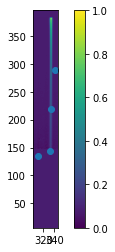

20872.355


In [195]:
#print(spec2_file1.data[0,pixloc[3]])
plt.imshow(spec2_file1.data)
plt.xlim(left,right)
plt.ylim(down,up)
x,y = pixlocorder.T
plt.scatter(x,y)
plt.colorbar()
plt.show()
print(spec2_file1.data[382, 334])

In [190]:
maxindex = spec2_file1.data.argmax()
print(maxindex)
np.unravel_index(spec2_file1.data.argmax(), spec2_file1.data.shape)

394558


(382, 334)

In [196]:
print(spec2_file1.data[pixloc[3][0],pixloc[3][1]])
spec2_file1.data[pixloc[0][0],pixloc[0][1]] = outliervalue
spec2_file1.data[pixloc[1][0],pixloc[1][1]] = outliervalue
spec2_file1.data[pixloc[2][0],pixloc[2][1]] = outliervalue
spec2_file1.data[pixloc[3][0],pixloc[3][1]] = outliervalue
print(spec2_file1.data[pixloc[3][0],pixloc[3][1]])
print(spec2_file1.data[382, 334])
spec2_file1.save('./spec2_file1_outlier.fits')

-0.0
20872.355
20872.355


'./spec2_file1_outlier.fits'

2021-07-16 16:53:05,767 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



<ImageModel(1024, 1032) from spec2_file1_outlier.fits>
20872.355
20872.355


(6.0, 396.0)

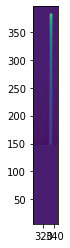

In [197]:
sanitycheck = datamodels.open('./spec2_file1_outlier.fits')
print(sanitycheck)
print(sanitycheck.data[pixloc[3][0],pixloc[3][1]])
print(sanitycheck.data[382, 334])
plt.imshow(sanitycheck.data)
plt.xlim(left,right)
plt.ylim(down,up)
#plt.xlim(x[0]-5, x[0]+5)
#plt.ylim(y[0]-5, y[0]+5)

2021-07-16 16:53:50,187 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



(284.0, 294.0)

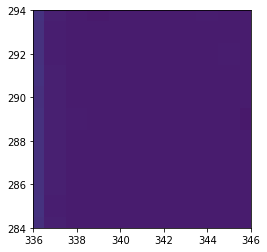

In [198]:
plt.imshow(sanitycheck.data)
plt.xlim(x[0]-5, x[0]+5)
plt.ylim(y[0]-5, y[0]+5)

In [199]:
print(spec2_file2.data[pixloc[3][0],pixloc[3][1]])
spec2_file2.data[pixloc2[0][0],pixloc2[0][1]] = outliervalue
spec2_file2.data[pixloc2[1][0],pixloc2[1][1]] = outliervalue
spec2_file2.data[pixloc2[2][0],pixloc2[2][1]] = outliervalue
spec2_file2.data[pixloc2[3][0],pixloc2[3][1]] = outliervalue
print(spec2_file2.data[pixloc2[3][0],pixloc2[3][1]])
print(spec2_file2.data[382, 334])
spec2_file2.save('./spec2_file2_outlier.fits')

-0.0
20872.355
-12.235362


'./spec2_file2_outlier.fits'

In [208]:
asn3_files = glob.glob('*_outlier.fits')
print(asn3_files)
asn3 = asn_from_list(asn3_files, rule=DMS_Level3_Base,product_name='combine_dithers_exposures')
#asn3.save('./lrs-slit-spec3.json')

['spec2_file2_outlier.fits', 'spec2_file1_outlier.fits']


In [205]:
Spec3Pipeline.call(asn3, save_results=True)

ValueError: Can't initialize datamodel using <class 'jwst.associations.lib.rules_level3_base.DMS_Level3_Base'>

In [8]:
outlier_detect1 = datamodels.open('combine_dithers_exposures_s2d.fits')

2021-07-12 13:55:31,701 - stpipe - WARNING - /Users/kmurray/anaconda3/envs/jwst7.7.1/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



In [14]:
print(outlier_detect1.meta.wcs.bounding_box[0][1]) #, outlier_detect.meta.wcs.bounding_box[0][0],outlier_detect.meta.wcs.bounding_box[1][1],outlier_detect.meta.wcs.bounding_box[1][0])
bbox_w = outlier_detect1.meta.wcs.bounding_box[0][1] - outlier_detect1.meta.wcs.bounding_box[0][0]
bbox_ht = outlier_detect1.meta.wcs.bounding_box[1][1] - outlier_detect1.meta.wcs.bounding_box[1][0]
left = outlier_detect1.meta.wcs.bounding_box[0][0]
right = outlier_detect1.meta.wcs.bounding_box[0][1]
down = outlier_detect1.meta.wcs.bounding_box[1][0]
up = outlier_detect1.meta.wcs.bounding_box[1][1]
print('Model bbox (nod 1)= {0} '.format(outlier_detect1.meta.wcs.bounding_box))
print('Model: Height x width of bounding box (nod 1) = {0} x {1} pixels'.format(bbox_ht, bbox_w))
print(left, right, down, up)

4.5
Model bbox (nod 1)= ((-0.5, 4.5), (-0.5, 386.5)) 
Model: Height x width of bounding box (nod 1) = 387.0 x 5.0 pixels
-0.5 4.5 -0.5 386.5


In [16]:
pixloc = []
pixloc.append([random.randint(int(left),int(right)),random.randint(int(down),int(up))])
pixloc.append([random.randint(int(left),int(right)),random.randint(int(down),int(up))])
pixloc.append([random.randint(int(left),int(right)),random.randint(int(down),int(up))])
pixloc.append([random.randint(int(left),int(right)),random.randint(int(down),int(up))])
#print(pixloc)

[[4, 204], [1, 94], [1, 205], [0, 12]]
